In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, FunctionTransformer, label_binarize, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, make_scorer, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc,roc_auc_score, silhouette_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from math import pi

no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=14kwjt9EWSSQ6H8QHVCC9zq2tJda1Hw7b')

In [3]:
df.head()

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
0,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
2,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987259 entries, 0 to 987258
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       987259 non-null  int64 
 1   product_id     987259 non-null  int64 
 2   product_name   987259 non-null  object
 3   aisle_id       987259 non-null  int64 
 4   aisle          987259 non-null  object
 5   department_id  987259 non-null  int64 
 6   department     987259 non-null  object
dtypes: int64(4), object(3)
memory usage: 52.7+ MB


In [6]:
df.isnull().sum()

order_id         0
product_id       0
product_name     0
aisle_id         0
aisle            0
department_id    0
department       0
dtype: int64

In [9]:
df.describe()

,order_id,product_id,aisle_id,department_id
count,987259.000000,987259.000000,987259.000000,987259.000000
mean,50018.074081,25575.839196,71.207365,9.919778
std,28916.254672,14100.318531,38.185998,6.284092
min,1.000000,1.000000,1.000000,1.000000
25%,24932.000000,13500.000000,31.000000,4.000000
50%,50016.000000,25256.000000,83.000000,9.000000
75%,75003.000000,37917.000000,107.000000,16.000000
max,100000.000000,49688.000000,134.000000,21.000000


There are no null values. Therefore we assume there are no missing values  

In [7]:
#Checking to see if there is any possible spelling mistakes within the data
# Assuming your dataset is loaded in a pandas DataFrame named `df`
unique_product_names = df['product_name'].unique()
unique_aisles = df['aisle'].unique()
unique_departments = df['department'].unique()

# Display the results
print("Unique product names:", unique_product_names)
print("Unique aisles:", unique_aisles)
print("Unique departments:", unique_departments)


Unique product names: ['Bulgarian Yogurt' 'Organic 4% Milk Fat Whole Milk Cottage Cheese'
 'Organic Celery Hearts' ... 'Sliced Colby Jack Cheese' 'Peppermint Bark'
 'Healthy Trinity, 3 in 1, Capsules']
Unique aisles: ['yogurt' 'other creams cheeses' 'fresh vegetables' 'canned meat seafood'
 'fresh fruits' 'packaged cheese' 'eggs' 'spices seasonings'
 'oils vinegars' 'baking ingredients' 'doughs gelatins bake mixes'
 'spreads' 'packaged vegetables fruits' 'soy lactosefree'
 'poultry counter' 'bread' 'breakfast bakery' 'cold flu allergy'
 'energy granola bars' 'breakfast bars pastries' 'chips pretzels'
 'trail mix snack mix' 'crackers' 'refrigerated' 'energy sports drinks'
 'salad dressing toppings' 'prepared soups salads' 'milk' 'paper goods'
 'water seltzer sparkling water' 'kosher foods' 'packaged poultry'
 'instant foods' 'packaged produce' 'cookies cakes' 'candy chocolate'
 'body lotions soap' 'dry pasta' 'laundry' 'air fresheners candles'
 'frozen produce' 'buns rolls' 'canned frui

It appears as if there is no spelling mistakes within the columns or duplicates in the rows.

In [14]:
#looking at most popular items
# Find the top 15 most popular items in product_name
top_15_products = df['product_name'].value_counts().head(15)

# Display the result
print("Top 15 most popular products:")
print(top_15_products)

Top 15 most popular products:
product_name
Banana                    14494
Bag of Organic Bananas    11694
Organic Strawberries       8081
Organic Baby Spinach       7369
Organic Hass Avocado       6411
Organic Avocado            5313
Large Lemon                4688
Strawberries               4340
Limes                      4225
Organic Raspberries        4164
Organic Whole Milk         4089
Organic Yellow Onion       3360
Organic Garlic             3290
Organic Zucchini           3203
Organic Blueberries        3107
Name: count, dtype: int64


For optimized aisle, it is important to include the most popular items

In [15]:
#looking at most popular items
# Find the top 10 most popular department in product_name
top_10_department = df['department'].value_counts().head(10)

# Display the result
print("Top 10 most popular department:")
print(top_10_department)

Top 10 most popular department:
department
produce            288775
dairy eggs         164468
snacks              88093
beverages           81923
frozen              68202
pantry              56681
bakery              35806
canned goods        32486
deli                32008
dry goods pasta     26096
Name: count, dtype: int64


In [12]:
#looking at most popular items
# Find the top 10 most popular department in product_name
top_10_aisle= df['aisle'].value_counts().head(10)

# Display the result
print("Top 10 most popular aisle:")
print(top_10_aisle)

Top 10 most popular aisle:
aisle
fresh fruits                     110888
fresh vegetables                 103891
packaged vegetables fruits        54207
yogurt                            43857
packaged cheese                   29770
milk                              26942
water seltzer sparkling water     25354
chips pretzels                    21958
soy lactosefree                   19566
bread                             17806
Name: count, dtype: int64


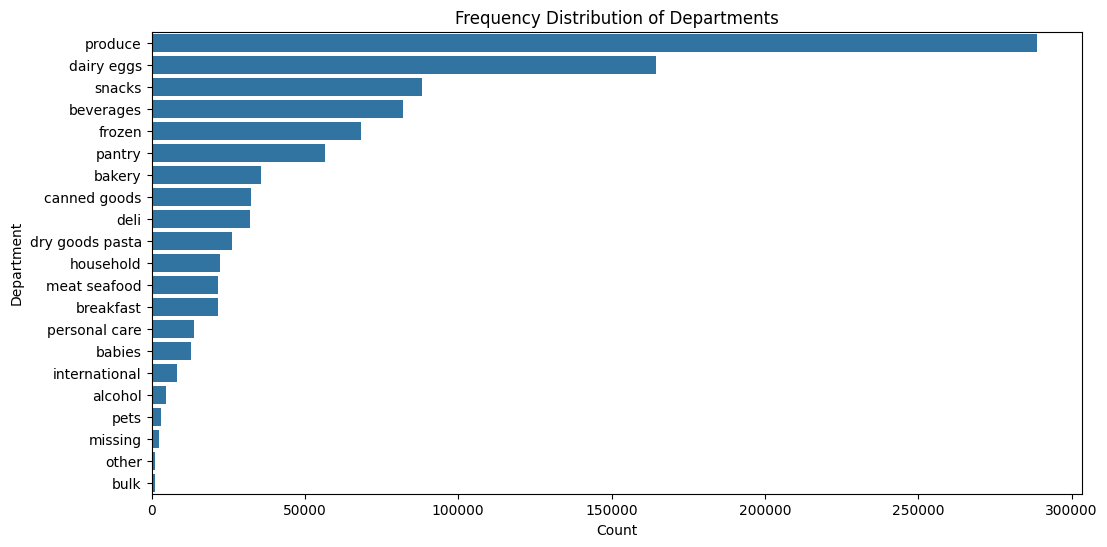

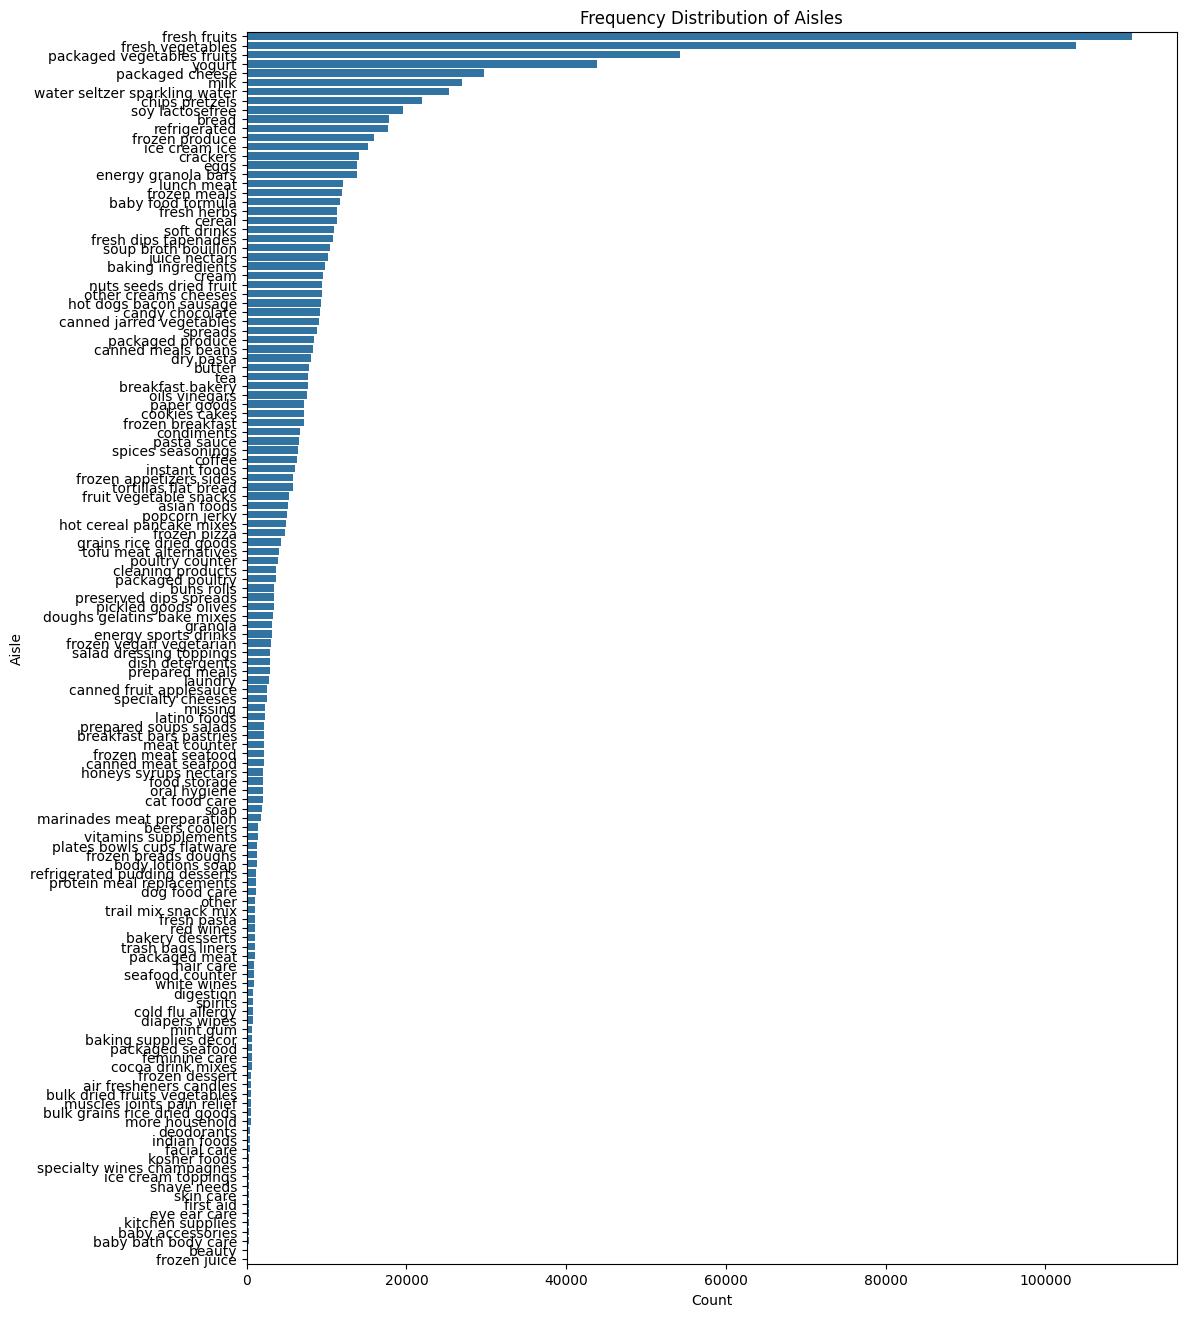

/Users/nicoleimoru/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


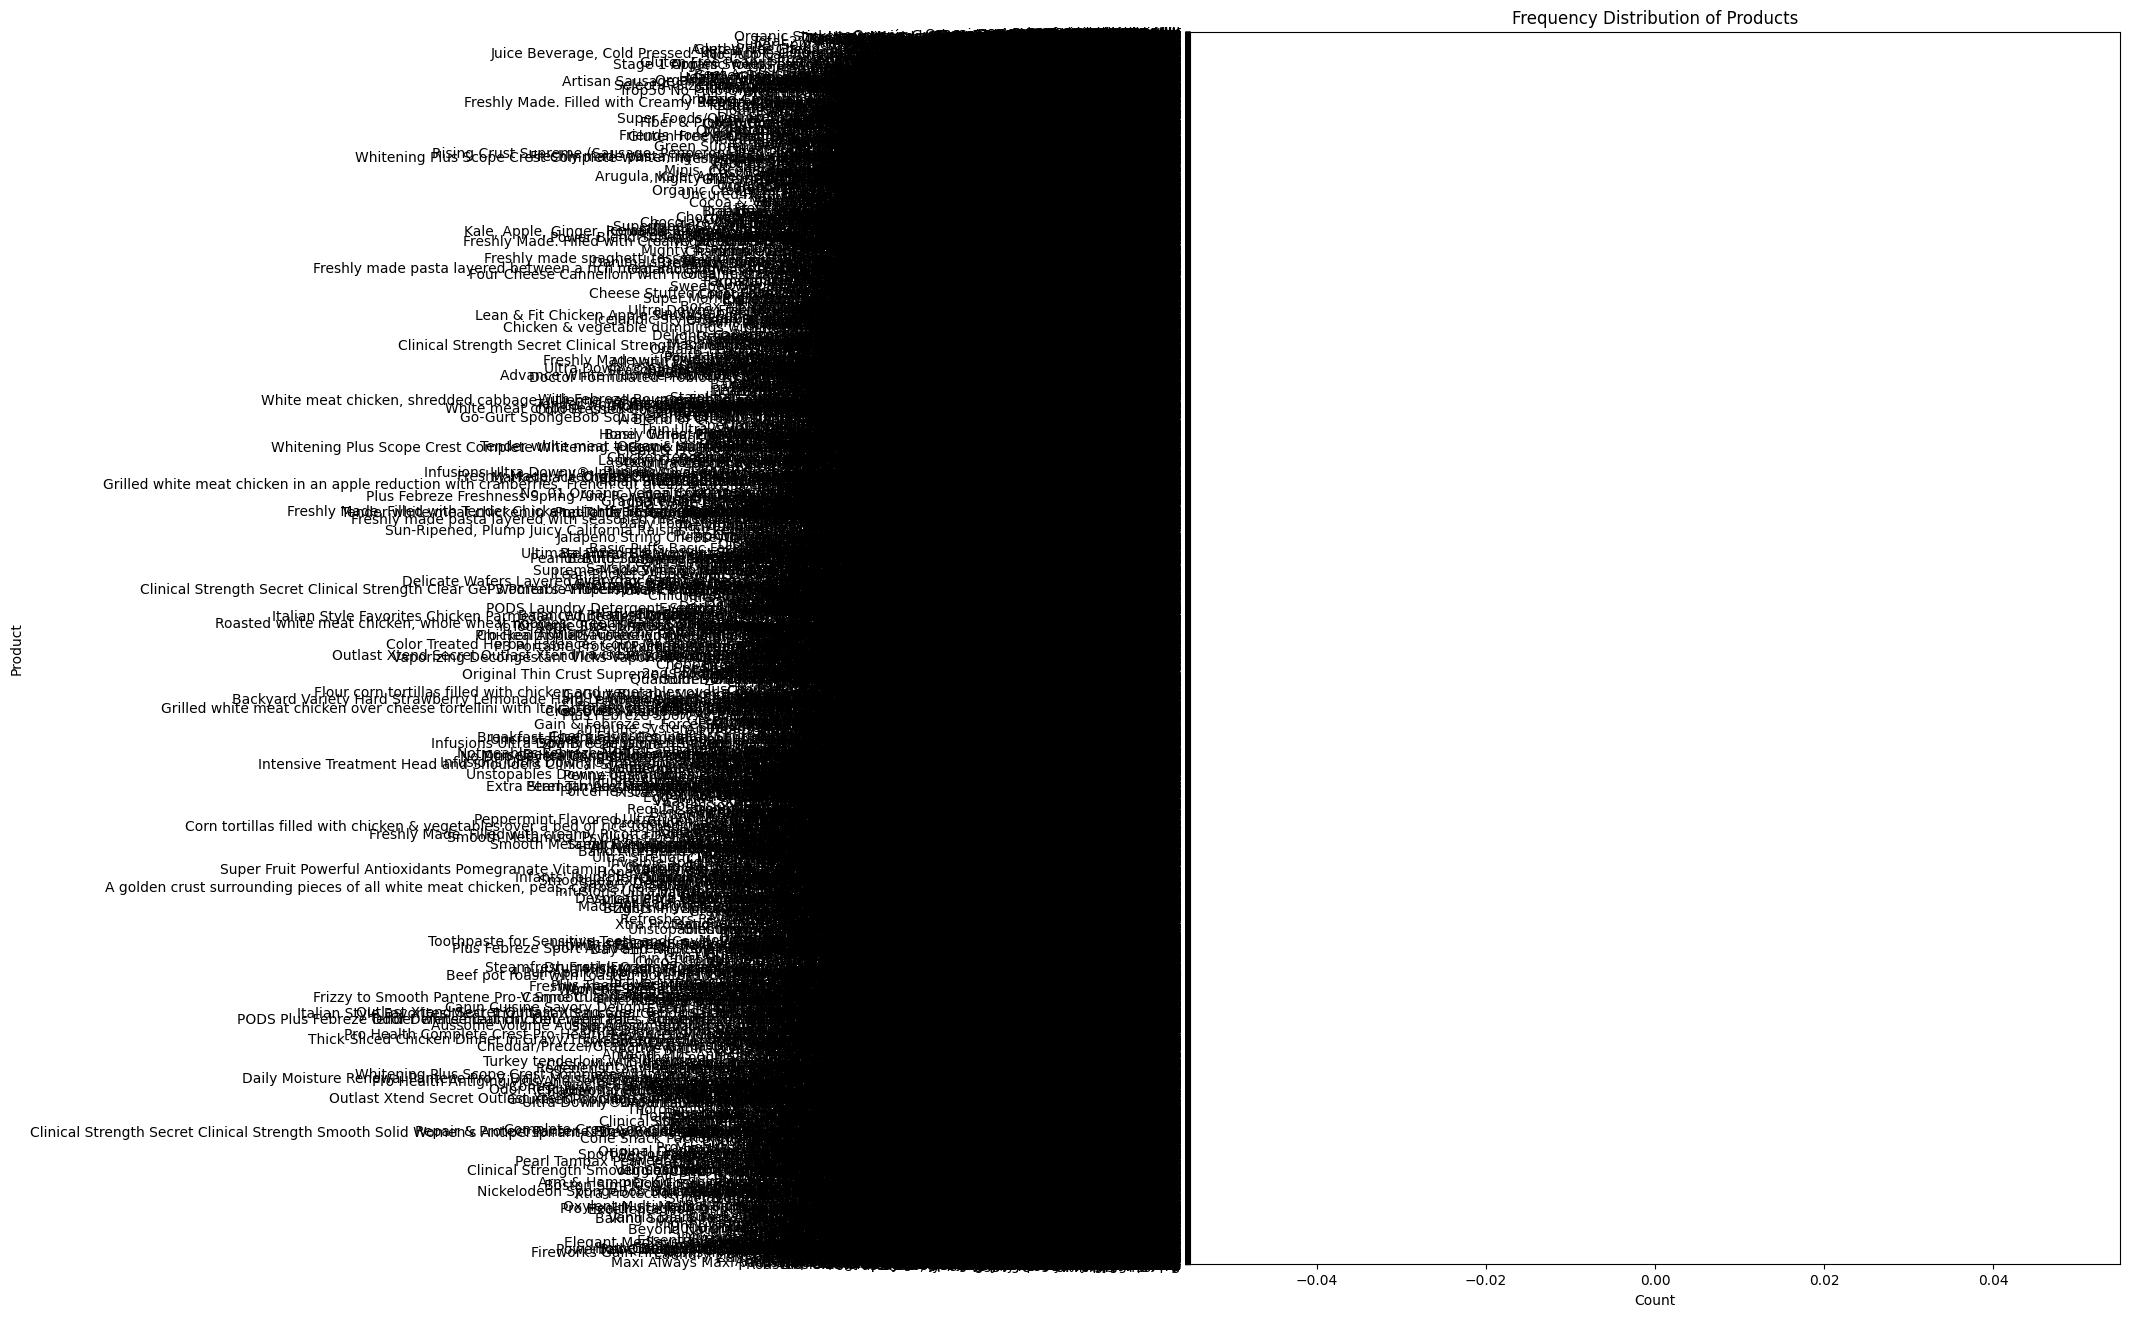

In [24]:

# Plot for the 'department' column
plt.figure(figsize=(12, 6))
sns.countplot(y='department', data=df, order=df['department'].value_counts().index)
plt.title('Frequency Distribution of Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

# Plot for the 'aisle' column
# Plot for the 'aisle' column (All aisles)
plt.figure(figsize=(12, 16))  # Adjust height for better readability
sns.countplot(y='aisle', data=df, order=df['aisle'].value_counts().index)  # All aisles sorted by frequency
plt.title('Frequency Distribution of Aisles')
plt.xlabel('Count')
plt.ylabel('Aisle')
plt.show()

# Plot for the 'aisle' column (All aisles)
plt.figure(figsize=(12, 16))  # Adjust height for better readability
sns.countplot(y='aisle', data=df, order=df['product_name'].value_counts().index)  # All aisles sorted by frequency
plt.title('Frequency Distribution of Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

In [25]:
# Count the total number of unique product names
unique_product_count = df['product_name'].nunique()
print(f"Total number of unique product names: {unique_product_count}")

Total number of unique product names: 35070
